# Data Descriptor of Neural-SWIFT

This repository contains the code and data description for the paper:

**["Neural Representation of the Stratospheric Ozone Chemistry](https://TBD)**  by Mohn et. al.

see data/README.md

![Version](https://img.shields.io/badge/version-0.0.2-green)

![Python version](https://upload.wikimedia.org/wikipedia/commons/a/a5/Blue_Python_3.8_Shield_Badge.svg)![PyTorch](https://img.shields.io/badge/PyTorch-1.11.2-orange) ![PyTorch-Lightning](https://img.shields.io/badge/PyTorch--Lightning-1.6.3-orange)


## How to handle the Data

### Download the dataset: SWIFT-AI-DS

- Please follow the recommendations: https://wiki.pangaea.de/wiki/Download_many
- Code repository related to the benchmark dataset: Mohn, H., Kreyling, D., Wohltmann, I., Lehmann, R., Rex, M., 2021. Benchmark dataset for 24-hour stratospheric ozone tendencies. https://doi.org/10.1594/PANGAEA.939121

### Load Options

In [1]:
# 12 Neural-SWIFT models and for each two datasets (training and testing) exist
# please choose the monthly model by selecting an index of 1 .. 12
month_idx = 1 
assert month_idx > 0 and month_idx < 13, 'please choose month_idx in the range of calendar months: 1 .. 12'

# Number of samples for figures
number_samples = 100

# Data (needs to be downloaded first)
path_to_data = 'data/training/'

# Neural-SWIFT variables
variables = ['Cly', 'Bry', 'NOy', 'HOy', 'Ox', 'z', 'overhead', 'temperature', 'daylight', 'O2_reaction_coef', 'O3_reaction_coef', 'ClOy_reaction_coef', 'ClOx_reaction_coef', 'dOx']

# assert correct entries
list_monthly_data = {}
flag_traindata = True # Training or Testing data for figures
assert number_samples > 0, 'please choose number_samples > 0'
import os.path
assert os.path.exists(path_to_data), 'please check the path to data and following description in readme.md.'


### Load dataset

In [2]:
# Neural-SWIFT data (one per calendar month having a window of three months)
from tools.load_dataset_three_months_window import load_dataset_three_months_window
dataset = load_dataset_three_months_window(path_to_data, month_idx, train=flag_traindata)

from tools.extract_samples import extract_samples
dataframe = extract_samples(dataset, number_samples)[variables]
list_monthly_data['month_{:02d}'.format(month_idx)] = dataframe
#dataset.close()

data = dataset

# get indices of input and output features
features = ["modeldate", "dayofyear", "month", "year", "overhead", "eqlat", "sza", "daylight", "O2_reaction_coef", "O3_reaction_coef", "NOx_reaction_coef", "NOy_reaction_coef", "ClOy_reaction_coef", "ClOx_reaction_coef", "longitude", "latitude", "z", "temperature", "theta", "pv", "Cly", "Bry", "NOy", "HOy", "Ox", "dOx", "dCly", "dBry", "dNOy", "dHOy"]
ind_features = []
for feat in ['Cly', 'Bry', 'NOy', 'HOy', 'Ox', 'z', 'overhead', 'temperature', 'daylight', 'O2_reaction_coef', 'O3_reaction_coef', 'ClOy_reaction_coef', 'ClOx_reaction_coef']:
    ind_features.append(features.index(feat))
for feat in ['dOx']:
    ind_features.append(features.index(feat))

# control number of samples
import numpy as np
rng = np.random.default_rng()


## Describe Data

In [3]:
# print one row of the tabular data as an example
assert list_monthly_data != {},  'Please load Data first.'

month = 'month_{:02d}'.format(month_idx)
print('First rows of the tabular data as an example:')
list_monthly_data[month].head()

First rows of the tabular data as an example:


,Cly,Bry,NOy,HOy,Ox,z,overhead,temperature,daylight,O2_reaction_coef,O3_reaction_coef,ClOy_reaction_coef,ClOx_reaction_coef,dOx
0,1.041695e-09,1.036595e-11,4.715605e-09,0.000006,1.298573e-06,12706.199683,392.061004,226.095971,9.655653,4.695476e-18,0.000006,0.000005,0.002018,-4.320064e-09
1,2.169435e-09,1.913197e-11,1.073865e-08,0.000005,5.843618e-06,26278.602456,114.849519,229.135680,9.012138,1.007757e-12,0.000047,0.000009,0.002558,-3.063393e-08
2,3.044272e-09,2.232726e-11,1.640803e-08,0.000005,4.913471e-06,28018.603158,64.691414,212.044916,6.821987,3.939510e-13,0.000033,0.000007,0.002140,-1.592187e-08
3,7.757250e-11,1.145421e-12,1.676760e-10,0.000005,1.661362e-07,18565.964916,220.248464,194.118875,12.428070,7.868183e-13,0.000070,0.000012,0.003305,4.967753e-09
4,1.237490e-11,1.736980e-13,2.400191e-11,0.000007,6.585330e-08,14563.896911,208.245872,198.022214,12.265274,1.354861e-13,0.000091,0.000014,0.003536,6.944820e-10


In [4]:
# Use pandas describe method as a short inside into the data
assert list_monthly_data != {},  'Please load Data first.'

month = 'month_{:02d}'.format(month_idx)
print('Statistics of the loaded data:')
list_monthly_data[month].describe()

Statistics of the loaded data:


,Cly,Bry,NOy,HOy,Ox,z,overhead,temperature,daylight,O2_reaction_coef,O3_reaction_coef,ClOy_reaction_coef,ClOx_reaction_coef,dOx
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.407056e-09,1.151260e-11,6.515948e-09,0.000006,2.982934e-06,21769.934913,171.262932,213.512199,11.502126,8.539021e-12,0.000082,0.000013,0.002892,-2.411484e-10
std,1.263226e-09,8.910537e-12,6.511267e-09,0.000005,2.929831e-06,6390.220273,74.229811,12.301358,3.914156,1.742543e-11,0.000066,0.000006,0.000698,4.552524e-08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,5.000000e-08,11009.542595,17.724764,185.690899,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-2.935233e-07
25%,8.928251e-11,1.299418e-12,2.290585e-10,0.000004,1.660088e-07,16365.625273,104.822390,204.680498,9.803139,3.744873e-14,0.000045,0.000010,0.002767,-3.516798e-09
50%,1.193927e-09,1.270067e-11,4.158327e-09,0.000005,1.952510e-06,20928.821037,194.581463,214.656452,11.599230,4.853467e-13,0.000068,0.000012,0.003163,2.819312e-10
75%,2.758763e-09,2.068022e-11,1.323730e-08,0.000006,5.568448e-06,27339.801963,226.295455,223.007062,13.006347,6.779938e-12,0.000093,0.000014,0.003290,5.071882e-09
max,3.586901e-09,2.431003e-11,1.907499e-08,0.000113,9.867728e-06,36890.318021,392.061004,247.007163,24.000000,1.481134e-10,0.000511,0.000050,0.003703,6.237161e-07


### Scatter Plot

Scatterplot of the output variable (dOx) over each of the 13 input variables:


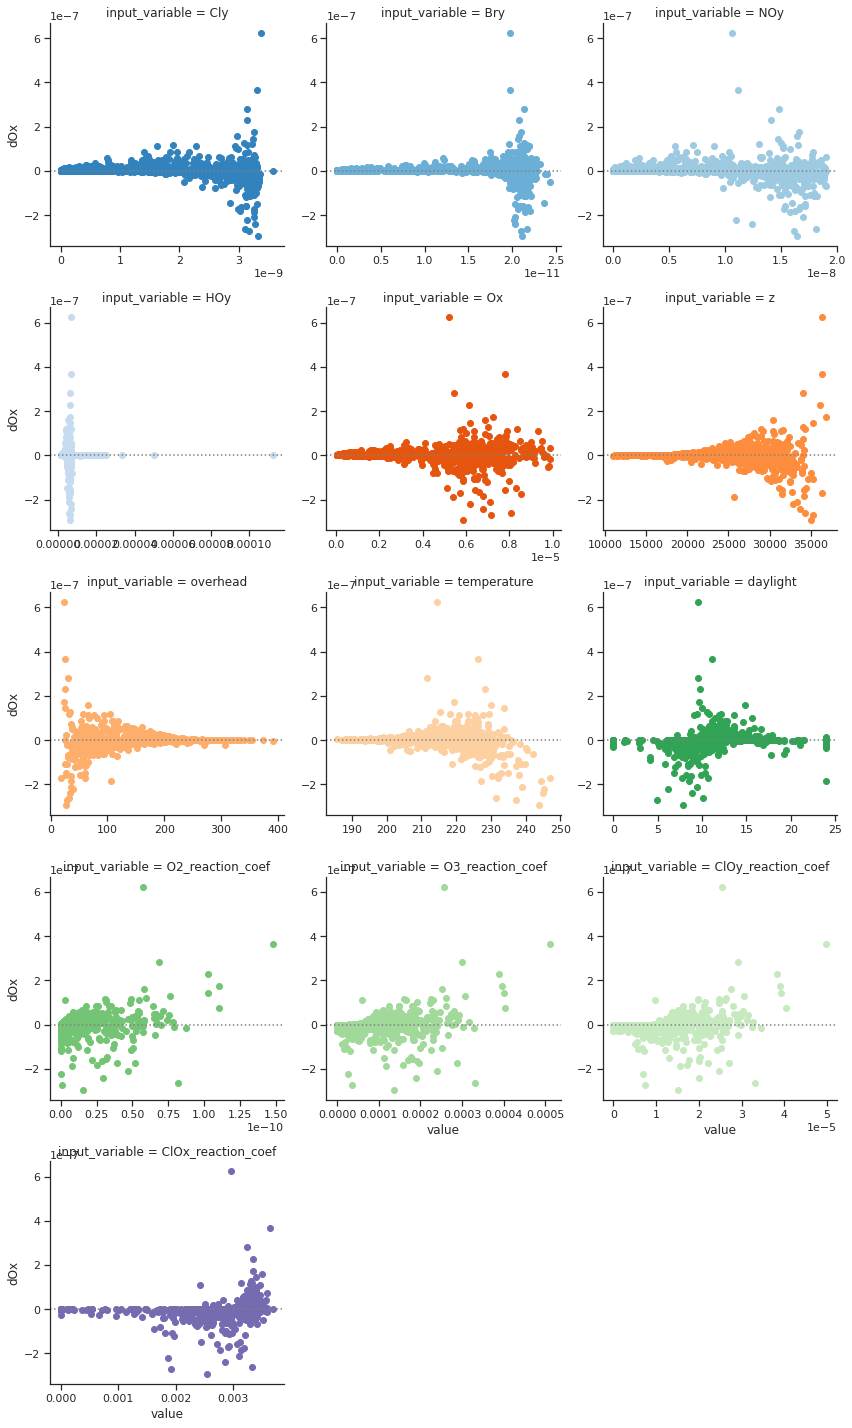

In [5]:
assert list_monthly_data != {},  'Please load Data first.'

month = 'month_{:02d}'.format(month_idx)
print('Scatterplot of the output variable (dOx) over each of the 13 input variables:')

from tools.vis_scatter import vis_scatter
#number_samples = 100
vis_scatter(list_monthly_data[month].sample(number_samples))

### Pearson's correlation Heatmap

Pearson's Correlation Heatmap of all involved variables. The last row depicts the correlation with respect to the output variable:


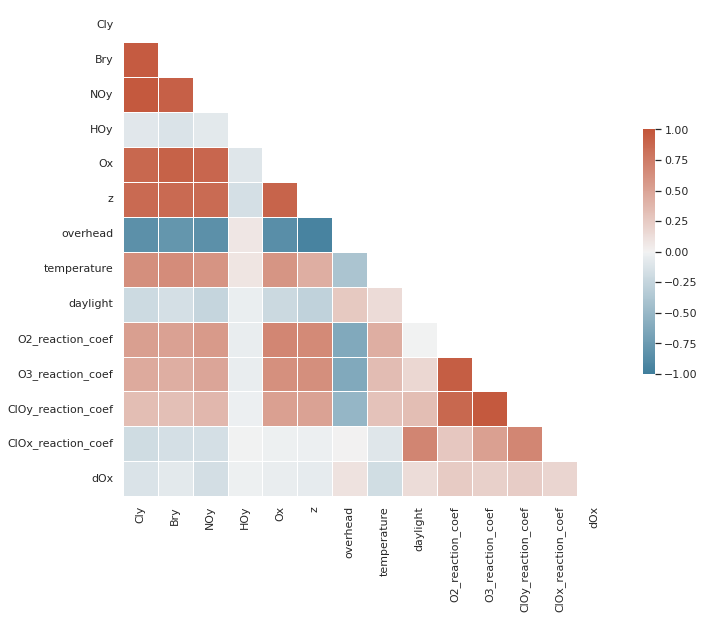

In [6]:
assert list_monthly_data != {},  'Please load Data first.'

month = 'month_{:02d}'.format(month_idx)
print('Pearson\'s Correlation Heatmap of all involved variables. The last row depicts the correlation with respect to the output variable:')

from tools.vis_pearsoncorrelation import vis_pearsoncorrelation
vis_pearsoncorrelation(list_monthly_data[month])

### Mean & Standard-Deviation of Training Data

In [7]:
# These values for Mean and Standard-Deviation have been used to normalize the data samples
import pandas as pd
import xarray as xr
tmp = xr.load_dataset('data/mean_stddev_training_data.nc')
variables_all = tmp.attrs['features'].replace('[', '').replace(']', '').replace('"', '').split(', ')
tmp = tmp.to_pandas()

# Neural-SWIFT variables
variables = ['Cly', 'Bry', 'NOy', 'HOy', 'Ox', 'z', 'overhead', 'temperature', 'daylight', 'O2_reaction_coef', 'O3_reaction_coef', 'ClOy_reaction_coef', 'ClOx_reaction_coef', 'dOx']

tmp['variables'] = variables_all
tmp = tmp.set_index(tmp['variables']).drop('variables', axis=1)
tmp.transpose()[variables]

variables,Cly,Bry,NOy,HOy,Ox,z,overhead,temperature,daylight,O2_reaction_coef,O3_reaction_coef,ClOy_reaction_coef,ClOx_reaction_coef,dOx
mean,1.384851e-09,1.132224e-11,6.515347e-09,5.986228e-06,2.865589e-06,21388.810035,176.410857,213.680001,11.692661,8.101067e-12,0.000080,0.000012,0.002925,-1.688835e-09
stddev,1.269869e-09,8.967345e-12,6.636562e-09,4.847265e-06,2.857633e-06,6126.226142,72.743691,11.225120,3.255406,1.660250e-11,0.000064,0.000006,0.000615,4.190035e-08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.435712e-07,1.060338e-09,9822.741458,7.869633,177.433597,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-2.287902e-06
max,4.001995e-09,2.681736e-11,2.120768e-08,7.673580e-04,1.231643e-05,39495.874695,519.487973,279.700182,24.000000,2.841930e-10,0.001092,0.000091,0.004317,1.185323e-06
median,1.025320e-09,1.172970e-11,3.508004e-09,5.253718e-06,1.724760e-06,20402.266446,199.833630,214.651714,11.836315,4.617501e-13,0.000066,0.000012,0.003134,1.610645e-10
q25,1.058848e-10,1.515075e-12,2.756237e-10,4.565158e-06,1.838130e-07,16167.973421,112.406106,205.707369,10.466960,3.116079e-14,0.000042,0.000010,0.002789,-3.924275e-09
q75,2.779209e-09,2.090426e-11,1.344003e-08,5.939966e-06,5.411868e-06,26667.175814,228.677169,222.058731,12.780673,6.756290e-12,0.000091,0.000013,0.003282,3.709524e-09


### Training